HW02
<br>
<br>
Di Tong

In [3]:
# import packages
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM, GRU
from keras.models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
# 1. Import the data and tokenize to use with Keras
testfile = open('data/congress_test.csv', "r+",encoding='utf-8', errors='ignore')
text = testfile.read()
testfile.seek(0)
testfile.write(text)
testfile.close()

trainfile = open('data/congress_train.csv', "r+",encoding='utf-8', errors='ignore')
text = trainfile.read()
trainfile.seek(0)
trainfile.write(text)
trainfile.close()

valfile = open('data/congress_val.csv', "r+",encoding='utf-8', errors='ignore')
text = valfile.read()
valfile.seek(0)
valfile.write(text)
valfile.close()

# import the data
train_data = pd.read_csv('data/congress_train.csv').dropna()
val_data = pd.read_csv('data/congress_val.csv').dropna()
test_data = pd.read_csv('data/congress_test.csv').dropna()
train_text = list(train_data['Title'])
train_text = [str(i) for i in train_text]
val_text = list(val_data['Title'])
val_text = [str(i) for i in val_text]
test_text = list(test_data['Title'])
test_text = [str(i) for i in test_text]
label_train = to_categorical(list(train_data['Major']))
label_val = to_categorical(list(val_data['Major']))
label_test = to_categorical(list(test_data['Major']))

# tokenize the data
# Keep only the 10000 most frequent words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)
train_seq = tokenizer.texts_to_sequences(train_text)
test_seq = tokenizer.texts_to_sequences(test_text)
val_seq = tokenizer.texts_to_sequences(val_text)
# Limit each bill's title to a maximum length of 100 words
# Pad each sequence to be of length 100
x_train = pad_sequences(train_seq, maxlen=100)
x_test = pad_sequences(test_seq, maxlen=100)
x_val = pad_sequences(val_seq, maxlen=100)

In [6]:
# 3. Estimate a basic feed-forward network
basic_ff = Sequential()
basic_ff.add(Embedding(10000, 32, input_length=100))
basic_ff.add(Flatten())
basic_ff.add(Dense(24, activation='softmax'))
basic_ff.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_basic_ff = basic_ff.fit(x_train, label_train, validation_data=(x_val, label_val), \
                               epochs=20, batch_size=512, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [8]:
# 4. Estimate a recurrent neural network (RNN) with a layer_simple_rnn
rnn = Sequential()
rnn.add(Embedding(10000, 20, input_length=100))
rnn.add(SimpleRNN(20))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn = rnn.fit(x_train, label_train, validation_data=(x_val, label_val), epochs=20, batch_size=512, verbose=0)

In [17]:
# 5. Estimate an RNN with an LSTM layer
lstm = Sequential()
lstm.add(Embedding(10000, 20, input_length=100))
lstm.add(LSTM(20))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm = lstm.fit(x_train, label_train, validation_data=(x_val, label_val), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 107s 383us/step - loss: 2.3292 - acc: 0.3105 - val_loss: 1.7269 - val_acc: 0.4982
Epoch 2/20
278612/278612 [==============================] - 105s 379us/step - loss: 1.4333 - acc: 0.6150 - val_loss: 1.2638 - val_acc: 0.6606
Epoch 3/20
278612/278612 [==============================] - 105s 378us/step - loss: 1.0512 - acc: 0.7366 - val_loss: 0.9832 - val_acc: 0.7576
Epoch 4/20
278612/278612 [==============================] - 105s 377us/step - loss: 0.8717 - acc: 0.7860 - val_loss: 0.8334 - val_acc: 0.7928
Epoch 5/20
278612/278612 [==============================] - 105s 377us/step - loss: 0.7583 - acc: 0.8119 - val_loss: 0.7868 - val_acc: 0.8004
Epoch 6/20
278612/278612 [==============================] - 105s 377us/step - loss: 0.6781 - acc: 0.8284 - val_loss: 0.7574 - val_acc: 0.8015
Epoch 7/20
278612/278612 [==============================] - 105s 376us/step - loss: 0.6208 - acc:

In [18]:
# 6. Estimate an RNN with a GRU layer
gru = Sequential()
gru.add(Embedding(10000, 20, input_length=100))
gru.add(GRU(20))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru = gru.fit(x_train, label_train, validation_data=(x_val, label_val), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 87s 312us/step - loss: 2.5469 - acc: 0.2195 - val_loss: 2.3165 - val_acc: 0.2773
Epoch 2/20
278612/278612 [==============================] - 86s 308us/step - loss: 1.8044 - acc: 0.4847 - val_loss: 1.5252 - val_acc: 0.5806
Epoch 3/20
278612/278612 [==============================] - 86s 308us/step - loss: 1.3135 - acc: 0.6510 - val_loss: 1.1558 - val_acc: 0.7034
Epoch 4/20
278612/278612 [==============================] - 86s 308us/step - loss: 1.0210 - acc: 0.7434 - val_loss: 0.9917 - val_acc: 0.7520
Epoch 5/20
278612/278612 [==============================] - 86s 308us/step - loss: 0.8759 - acc: 0.7824 - val_loss: 0.8575 - val_acc: 0.7886
Epoch 6/20
278612/278612 [==============================] - 85s 306us/step - loss: 0.7783 - acc: 0.8057 - val_loss: 0.8125 - val_acc: 0.7945
Epoch 7/20
278612/278612 [==============================] - 86s 309us/step - loss: 0.7133 - acc: 0.8200

In [19]:
# 7. Estimate five additional neural network models with different configurations of hyperparameters

# model 1: an RNN with a layer_simple_rnn with 32 hidden units and dropout rate of 0.1. 
m1 = Sequential()
m1.add(Embedding(10000, 32, input_length=100))
m1.add(LSTM(32, dropout=0.1))
m1.add(Dense(24, activation='softmax'))
m1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m1 = m1.fit(x_train, label_train, validation_data=(x_val, label_val), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 112s 402us/step - loss: 2.1181 - acc: 0.3881 - val_loss: 1.5519 - val_acc: 0.5568
Epoch 2/20
278612/278612 [==============================] - 111s 398us/step - loss: 1.1214 - acc: 0.7117 - val_loss: 0.9935 - val_acc: 0.7478
Epoch 3/20
278612/278612 [==============================] - 111s 398us/step - loss: 0.7912 - acc: 0.7985 - val_loss: 0.7857 - val_acc: 0.7954
Epoch 4/20
278612/278612 [==============================] - 111s 398us/step - loss: 0.6775 - acc: 0.8241 - val_loss: 0.7045 - val_acc: 0.8151
Epoch 5/20
278612/278612 [==============================] - 111s 399us/step - loss: 0.6175 - acc: 0.8368 - val_loss: 0.6457 - val_acc: 0.8283
Epoch 6/20
278612/278612 [==============================] - 111s 398us/step - loss: 0.5756 - acc: 0.8461 - val_loss: 0.6195 - val_acc: 0.8350
Epoch 7/20
278612/278612 [==============================] - 111s 399us/step - loss: 0.5453 - acc:

In [20]:
# model 2: an RNN with a GRU layer with dropout rate of 0.1 
m2 = Sequential()
m2.add(Embedding(10000, 20, input_length=100))
m2.add(GRU(20, dropout=0.1))
m2.add(Dense(24, activation='softmax'))
m2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m2 = m2.fit(x_train, label_train, validation_data=(x_val, label_val), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 94s 337us/step - loss: 2.5420 - acc: 0.2309 - val_loss: 2.1343 - val_acc: 0.3916
Epoch 2/20
278612/278612 [==============================] - 92s 331us/step - loss: 1.7693 - acc: 0.5065 - val_loss: 1.4513 - val_acc: 0.6224
Epoch 3/20
278612/278612 [==============================] - 93s 334us/step - loss: 1.2541 - acc: 0.6799 - val_loss: 1.0814 - val_acc: 0.7321
Epoch 4/20
278612/278612 [==============================] - 92s 332us/step - loss: 1.0014 - acc: 0.7501 - val_loss: 0.9517 - val_acc: 0.7633
Epoch 5/20
278612/278612 [==============================] - 92s 332us/step - loss: 0.8797 - acc: 0.7819 - val_loss: 0.8409 - val_acc: 0.7927
Epoch 6/20
278612/278612 [==============================] - 93s 335us/step - loss: 0.7991 - acc: 0.8021 - val_loss: 0.7844 - val_acc: 0.8048
Epoch 7/20
278612/278612 [==============================] - 93s 332us/step - loss: 0.7416 - acc: 0.8137

In [21]:
# model 3: an RNN with a layer_simple_rnn with dropout rate of 0.1 
m3 = Sequential()
m3.add(Embedding(10000, 20, input_length=100))
m3.add(SimpleRNN(20, dropout=0.1))
m3.add(Dense(24, activation='softmax'))
m3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m3 = m3.fit(x_train, label_train, validation_data=(x_val, label_val), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 46s 165us/step - loss: 2.4752 - acc: 0.2620 - val_loss: 2.0954 - val_acc: 0.3729
Epoch 2/20
278612/278612 [==============================] - 45s 163us/step - loss: 1.8342 - acc: 0.4475 - val_loss: 1.6683 - val_acc: 0.5095
Epoch 3/20
278612/278612 [==============================] - 45s 161us/step - loss: 1.5442 - acc: 0.5534 - val_loss: 1.5608 - val_acc: 0.5414
Epoch 4/20
278612/278612 [==============================] - 45s 160us/step - loss: 1.3529 - acc: 0.6220 - val_loss: 1.2767 - val_acc: 0.6523
Epoch 5/20
278612/278612 [==============================] - 45s 161us/step - loss: 1.2205 - acc: 0.6664 - val_loss: 1.2061 - val_acc: 0.6741
Epoch 6/20
278612/278612 [==============================] - 45s 161us/step - loss: 1.1395 - acc: 0.6924 - val_loss: 1.2022 - val_acc: 0.6770
Epoch 7/20
278612/278612 [==============================] - 45s 160us/step - loss: 1.0898 - acc: 0.7080

In [22]:
# model 4: an RNN with a layer_simple_rnn with dropout rate of 0.5 
m4 = Sequential()
m4.add(Embedding(10000, 20, input_length=100))
m4.add(SimpleRNN(20, dropout=0.5))
m4.add(Dense(24, activation='softmax'))
m4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m4 = m4.fit(x_train, label_train, validation_data=(x_val, label_val), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 46s 166us/step - loss: 2.4791 - acc: 0.2610 - val_loss: 1.9822 - val_acc: 0.3893
Epoch 2/20
278612/278612 [==============================] - 45s 160us/step - loss: 1.8654 - acc: 0.4384 - val_loss: 1.6647 - val_acc: 0.5100
Epoch 3/20
278612/278612 [==============================] - 45s 161us/step - loss: 1.6629 - acc: 0.5074 - val_loss: 1.4601 - val_acc: 0.5796
Epoch 4/20
278612/278612 [==============================] - 45s 161us/step - loss: 1.5239 - acc: 0.5558 - val_loss: 1.3149 - val_acc: 0.6319
Epoch 5/20
278612/278612 [==============================] - 45s 160us/step - loss: 1.4195 - acc: 0.5912 - val_loss: 1.2538 - val_acc: 0.6561
Epoch 6/20
278612/278612 [==============================] - 45s 161us/step - loss: 1.3569 - acc: 0.6135 - val_loss: 1.1878 - val_acc: 0.6781
Epoch 7/20
278612/278612 [==============================] - 45s 162us/step - loss: 1.3114 - acc: 0.6287

In [23]:
# model 5: an RNN with a GRU layer and dropout regularization
m5 = Sequential()
m5.add(Embedding(10000, 20, input_length=100))
m5.add(GRU(20, dropout=0.1, recurrent_dropout=0.1))
m5.add(Dense(24, activation='softmax'))
m5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_m5 = m5.fit(x_train, label_train, validation_data=(x_val, label_val), epochs=20, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/20
278612/278612 [==============================] - 101s 363us/step - loss: 2.4723 - acc: 0.2514 - val_loss: 1.8832 - val_acc: 0.4818
Epoch 2/20
278612/278612 [==============================] - 99s 354us/step - loss: 1.5995 - acc: 0.5679 - val_loss: 1.2161 - val_acc: 0.7018
Epoch 3/20
278612/278612 [==============================] - 98s 353us/step - loss: 1.1338 - acc: 0.7162 - val_loss: 0.9423 - val_acc: 0.7713
Epoch 4/20
278612/278612 [==============================] - 100s 357us/step - loss: 0.9188 - acc: 0.7711 - val_loss: 0.7907 - val_acc: 0.8017
Epoch 5/20
278612/278612 [==============================] - 98s 353us/step - loss: 0.7918 - acc: 0.7980 - val_loss: 0.7059 - val_acc: 0.8179
Epoch 6/20
278612/278612 [==============================] - 99s 356us/step - loss: 0.7167 - acc: 0.8134 - val_loss: 0.6584 - val_acc: 0.8263
Epoch 7/20
278612/278612 [==============================] - 100s 358us/step - loss: 0.6668 - acc: 0.8

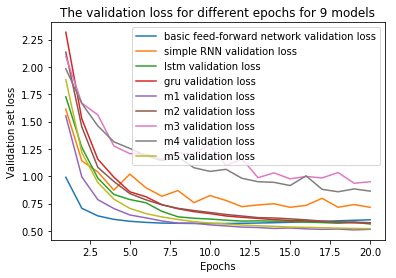

In [26]:
# 8. For each model, plot the validation loss and accuracy over each epoch.

# as some models only have 20 epoches, I only compare the results for the first 20 epoches for all models
epochs = np.arange(1, 21)

# plot the validation loss
loss_basic_ff = result_basic_ff.history['val_loss']
loss_rnn = result_rnn.history['val_loss']
loss_lstm = result_lstm.history['val_loss']
loss_gru = result_gru.history['val_loss']
loss_m1 = result_m1.history['val_loss']
loss_m2 = result_m2.history['val_loss']
loss_m3 = result_m3.history['val_loss']
loss_m4 = result_m4.history['val_loss']
loss_m5 = result_m5.history['val_loss']
plt.plot(epochs, loss_basic_ff[:20], label='basic feed-forward network validation loss')
plt.plot(epochs, loss_rnn[:20], label='simple RNN validation loss')
plt.plot(epochs, loss_lstm[:20], label='lstm validation loss')
plt.plot(epochs, loss_gru[:20], label='gru validation loss')
plt.plot(epochs, loss_m1[:20], label='m1 validation loss')
plt.plot(epochs, loss_m2[:20], label='m2 validation loss')
plt.plot(epochs, loss_m3[:20], label='m3 validation loss')
plt.plot(epochs, loss_m4[:20], label='m4 validation loss')
plt.plot(epochs, loss_m5[:20], label='m5 validation loss')
plt.ylabel('Validation set loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('The validation loss for different epochs for 9 models')
plt.show()

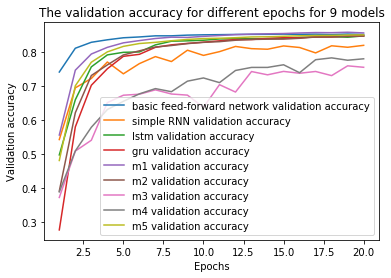

In [25]:
# plot the validation accuracy 
acc_basic_ff = result_basic_ff.history['val_acc']
acc_rnn = result_rnn.history['val_acc']
acc_lstm = result_lstm.history['val_acc']
acc_gru = result_gru.history['val_acc']
acc_m1 = result_m1.history['val_acc']
acc_m2 = result_m2.history['val_acc']
acc_m3 = result_m3.history['val_acc']
acc_m4 = result_m4.history['val_acc']
acc_m5 = result_m5.history['val_acc']
plt.plot(epochs, acc_basic_ff[:20], label='basic feed-forward network validation accuracy')
plt.plot(epochs, acc_rnn[:20], label='simple RNN validation accuracy')
plt.plot(epochs, acc_lstm[:20], label='lstm validation accuracy')
plt.plot(epochs, acc_gru[:20], label='gru validation accuracy')
plt.plot(epochs, acc_m1[:20], label='m1 validation accuracy')
plt.plot(epochs, acc_m2[:20], label='m2 validation accuracy')
plt.plot(epochs, acc_m3[:20], label='m3 validation accuracy')
plt.plot(epochs, acc_m4[:20], label='m4 validation accuracy')
plt.plot(epochs, acc_m5[:20], label='m5 validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('The validation accuracy for different epochs for 9 models')
plt.show()

Viewing from the two plots above, the best model is model 1 (an RNN with a layer_simple_rnn, 32 hidden units and 0.1 dropout rate) with the lowest validation loss and highest validation accuracy for most epoches.
<br>

In [27]:
# 9. Select the best performing model based on the validation set and evaluate its performance using the test set. 
m1.evaluate(x_test, label_test)

38693/38693 [==============================] - 79s 2ms/step


[0.5208771493801656, 0.8573385366877627]

My neural network perform worse than hand-coding, as its accuracy rate is about 85%, much lower than the 95% accuracy rate of hand-coding.